<a href="https://colab.research.google.com/github/Himanshu4782652/Machine-Learning-for-Trading-/blob/main/ML_for_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Machine Learning for stocks</h2>
Step:1: Getting some historic data.

Libraries or modules:

Yahoo Finance module

Create Charts

Handle dataframes-pandas

We need datatime function

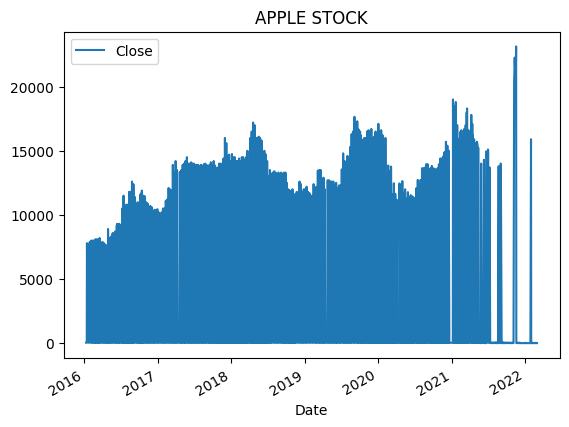

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date,time

#install yahoo finance libraries
try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance

try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials
  import yahoofinancials

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings('ignore')

#download our historical data
df = yf.download('ITC',  #here type companies name and run again
                 start='2010-01-01',
                 end=date.today(),
                 progress=False)

#create a simple chart
df.plot(y='Close', title='APPLE STOCK')
plt.show()

creating technical analysis indicators and we are also going to plot them

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,
2016-06-02,38.786900,39.994499,38.644798,39.781399,39.781399,1477440,32.695836,45.141133,47.731679,-43.451979,-41.654361,-41.686309
2016-06-03,8600.000000,8700.000000,8500.000000,8700.000000,8700.000000,48560,89.207242,62.526269,56.768663,129.756582,161.374799,171.604826
2016-06-06,38.502701,38.502701,37.650299,37.863400,37.863400,515745,33.290557,45.646069,47.856091,-43.486160,-42.760970,-42.250920
2016-06-07,37.579201,37.792400,36.655701,36.939899,36.939899,1230557,33.286109,45.644536,47.855228,-43.503406,-42.781302,-42.270630
2016-06-08,37.082001,37.437199,37.010899,37.082001,37.082001,480166,33.288852,45.644864,47.855384,-43.501211,-42.778677,-42.266669


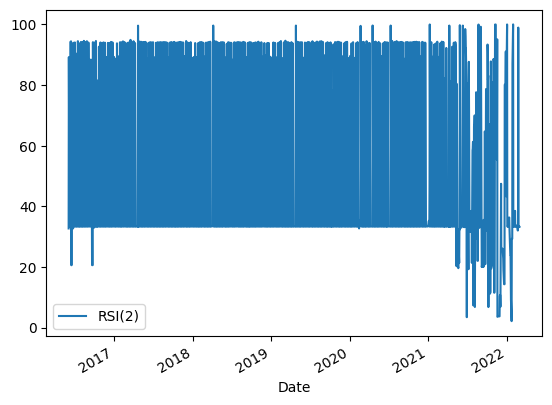

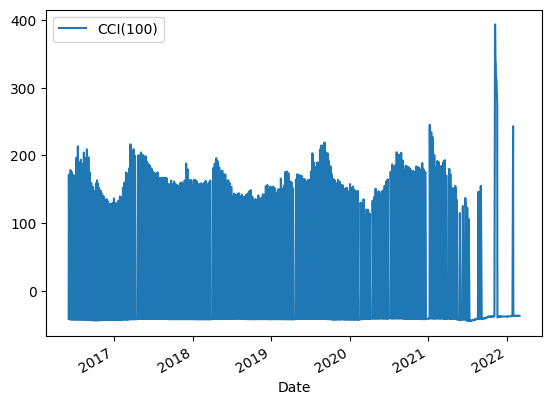

In [36]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta

df['RSI(2)'] = ta.rsi(df['Close'], length=2)
df['RSI(7)'] = ta.rsi(df['Close'], length=7)
df['RSI(14)'] = ta.rsi(df['Close'], length=14)
df['CCI(30)'] = ta.cci(close=df['Close'], length=30, high=df['High'], low=df['Low'])
df['CCI(50)'] = ta.cci(close=df['Close'], length=50, high=df['High'], low=df['Low'])
df['CCI(100)'] = ta.cci(close=df['Close'], length=100, high=df['High'], low=df['Low'])

#drop NaN values
df = df.dropna()

#create a plot showing some of our indicators
# df.plot(y=['Close', 'RSI(2)', 'RSI(7)', 'RSI(14)', 'CCI(30)', 'CCI(50)', 'CCI(100)'])
# plt.show()
df.plot(y='RSI(2)')
df.plot(y='CCI(100)')

#how's our current dataframe going
df.head()

Preparing our data labelling

What do you want to do over here?

When we place our trade: Buy at Open(over the next day)
we want to close our trade:at the next day at open.

Formula:

Handling the returns this ways:Buy:Open(-1) - Closing:Open(-2)

We want to label our data in the following day.

BUY SIGNAL: Open(-2) > Open(-1)

SELL SIGNAL: Open(-2) < Open(-1)

indicators the current situation, and our labels take a look ahead of time to determine if we have a pattern.

In [37]:
import numpy as np
df['LABEL']=np.where(df['Open'].shift(-2) > df['Open'].shift(-1), "1", "0")
df=df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,,
2016-06-02,38.786900,39.994499,38.644798,39.781399,39.781399,1477440,32.695836,45.141133,47.731679,-43.451979,-41.654361,-41.686309,0
2016-06-03,8600.000000,8700.000000,8500.000000,8700.000000,8700.000000,48560,89.207242,62.526269,56.768663,129.756582,161.374799,171.604826,0
2016-06-06,38.502701,38.502701,37.650299,37.863400,37.863400,515745,33.290557,45.646069,47.856091,-43.486160,-42.760970,-42.250920,0
2016-06-07,37.579201,37.792400,36.655701,36.939899,36.939899,1230557,33.286109,45.644536,47.855228,-43.503406,-42.781302,-42.270630,1
2016-06-08,37.082001,37.437199,37.010899,37.082001,37.082001,480166,33.288852,45.644864,47.855384,-43.501211,-42.778677,-42.266669,1


Creating a Neural Network

SkLearn



In [38]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

#fitting- indicators and our labelling
x=df[df.columns[6:-1]].values
y=df['LABEL'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

mlp=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
mlp.fit(x_train, y_train)

predict_train=mlp.predict(x_train)
predict_test=mlp.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print('Train Data Accuracy')
print(classification_report(y_train, predict_train))
print('Testing Data Accuracy')
print(classification_report(y_test, predict_test))


Train Data Accuracy
              precision    recall  f1-score   support

           0       0.56      0.97      0.71       560
           1       0.57      0.06      0.10       453

    accuracy                           0.56      1013
   macro avg       0.56      0.51      0.40      1013
weighted avg       0.56      0.56      0.44      1013

Testing Data Accuracy
              precision    recall  f1-score   support

           0       0.59      0.92      0.71       259
           1       0.27      0.05      0.08       176

    accuracy                           0.56       435
   macro avg       0.43      0.48      0.40       435
weighted avg       0.46      0.56      0.46       435



BackTesting our Model

Measure the returns obtained by trading our global

[]

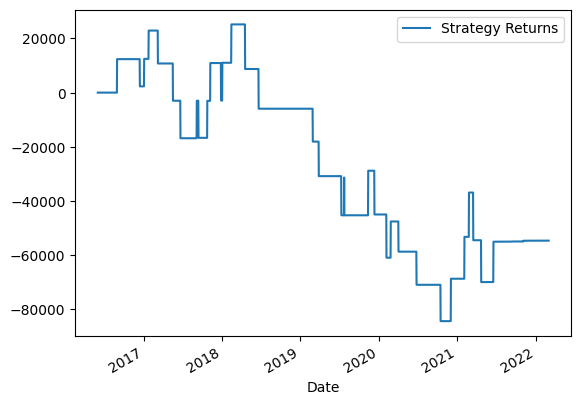

In [39]:
df['Prediction']=np.append(predict_train, predict_test)
df['Strategy Returns']=np.where(df['Prediction'].eq("1"),df['Open'].shift(-2)-df['Open'].shift(-1),0)
df['Strategy Returns']=df['Strategy Returns'].cumsum()

df.plot(y=['Strategy Returns'])
plt.plot()

In [40]:
prediction=df.iloc[-1]['Prediction']

if prediction == '1':
  print("Today's return forcast: UP")
else:
  print("Today's return forcast: DOWN")

Today's return forcast: DOWN
